# Project: No-show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, a dataset of appointment records in public hospitals at Vitoria, Brazil is investigated. The reason why the patient did not show up attracts our attention. This dataset contains records whether patients miss appointments, attributes of patients and information about appointments. The data set is provided on [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).

Through this project we will try to answer some questions about the reasons for patients miss appointments.

### Questions


> 1. Do patients who receive SMS have a higher percentage of having the consultation?
> 2. Which gender has the highest no-show?
> 3. Which age group has the lowest and highest no-show rate?
> 4. Does too much time between scheduling and appointment day increase the rates of no-show?
> 5. Is there any correlation between hypertension and diabetes in relation to no-shows?
> 6. Which day of the week receives more appointments? And which has the highest no-show rate?

### Description from Dataset Features

- **PatientId:**
    - Identification of a patient.
- **AppointmentID:**
    - Identification of each appointment.
- **Gender:**
    - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
- **ScheduledDay:**
    - The day someone called or registered the appointment, this is before appointment of course.
- **AppointmentDay:**
    - The day of the actuall appointment, when they have to visit the doctor.
- **Age:**
    - How old is the patient.
- **Neighbourhood:**
    - Where the appointment takes place.
- **Scholarship:**
    - True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
- **Hipertension:**
    - True or False.
- **Diabetes:**
    - True or False.
- **Alcoholism:**
    - True or False.
- **Handcap:**
    - Refers to the number of desabilites a person has. For example, if the person is blind and can't walk the total is 2.
- **SMS_received:**
    - 1 or more messages sent to the patient.
- **No-show:**
    - True or False.


### Import Python Libraries

In [1]:
# Import Pandas library to read and explore data
import pandas as pd
import numpy as np

In [2]:
# Import Matplotlib and Seaborn Libraries to create visualization from data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Used Pandas Dataframe to read data from csv
df = pd.read_csv('data/noshowappointments-kagglev2-may-2016.csv')

In [4]:
# Visualize dataframe
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Visualize dimensions from dataset
df.shape

(110527, 14)

In [6]:
# Visualize info about dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Visualize data missing
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

- **Notes:**
    - Dataset doesn't have missing data.

In [8]:
# Visualize statistics info about dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Function to plot distribuiton
def distribution(df, column, xlabel_fontsize=None, title_fontsize=None):
    """
    Input DataFrame and name of column and return history plot.
    Opcional Input: fontsize from xlabel, ylabel and title.
    """
    plt.hist(df);
    plt.title('Distribution number of patients by {}'.format(column), fontsize=title_fontsize)
    plt.xlabel('{}'.format(column), fontsize=xlabel_fontsize);

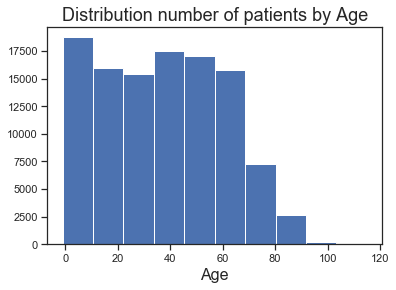

In [10]:
# Visualise Age distribution
distribution(df['Age'], 'Age', xlabel_fontsize=16, title_fontsize=18)

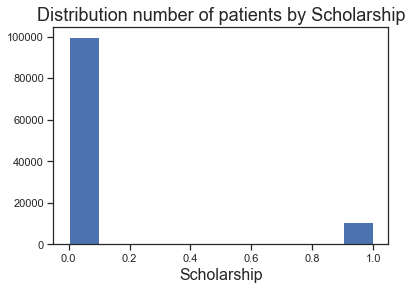

In [11]:
# Visualise Scholarship distribution
distribution(df['Scholarship'], 'Scholarship', xlabel_fontsize=16, title_fontsize=18)

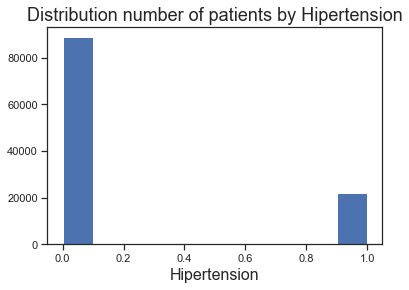

In [12]:
# Visualise Hipertension distribution
distribution(df['Hipertension'], 'Hipertension', xlabel_fontsize=16, title_fontsize=18)

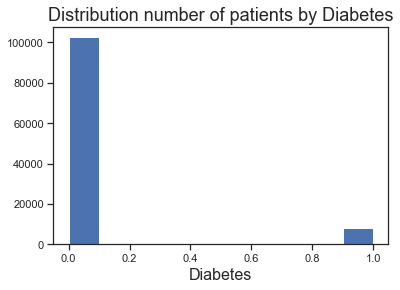

In [13]:
# Visualise Diabetes distribution
distribution(df['Diabetes'], 'Diabetes', xlabel_fontsize=16, title_fontsize=18)

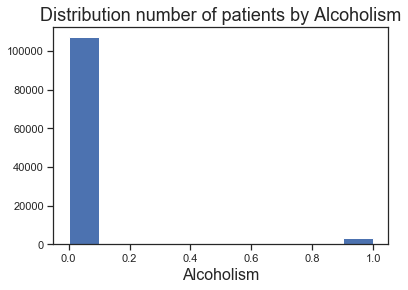

In [14]:
# Visualise Alcoholism distribution
distribution(df['Alcoholism'], 'Alcoholism', xlabel_fontsize=16, title_fontsize=18)

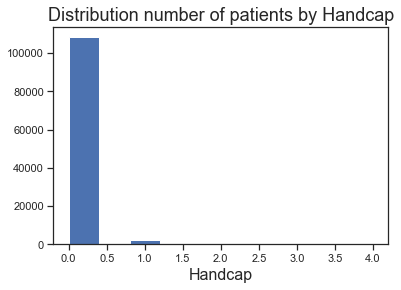

In [15]:
# Visualise Handcap distribution
distribution(df['Handcap'], 'Handcap', xlabel_fontsize=16, title_fontsize=18)

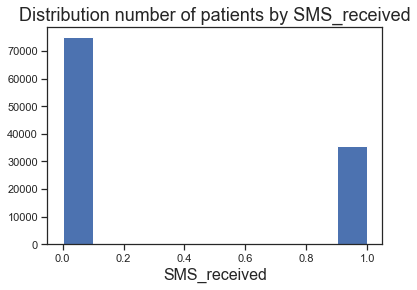

In [16]:
# Visualise SMS_received distribution
distribution(df['SMS_received'], 'SMS_received', xlabel_fontsize=16, title_fontsize=18)

In [17]:
# Verify number of unique valor from "Neighbourhood"
df['Neighbourhood'].nunique()

81

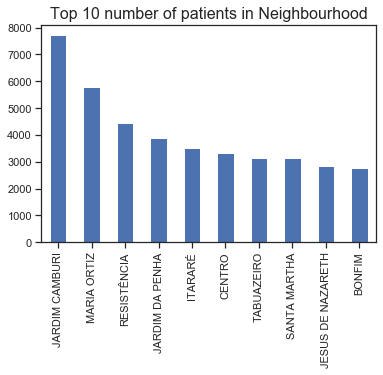

In [18]:
# Visualise Top 10 Neighbourhood distribution
(df['Neighbourhood'].value_counts(normalize=False)).head(10).plot(kind='bar')
plt.title('Top 10 number of patients in Neighbourhood', fontsize=16);

- **Notes:**
    - Least 25% from data are under 18 years old and with an average age of 37 years old and maximum age of 115 years old and minimum age of -1 (This is probably a mistake).
    - Scholarship, Hipertension, Diabetes, Alcoholism and Handcap have most of their data with a value of 0.
    - At least half did not receive SMS.

In [19]:
# Visualize unique values from column "No-show"
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df['No-show'].value_counts().values

array([88208, 22319])

In [21]:
# Function to plot percentage distribuiton
def pie_plot(df, list_labels, title, title_fontsize=None):
    """
    Input DataFrame, list of labels and title and return pie plot.
    Opcional Input: fontsize title.
    """
    (df.value_counts(normalize=True) * 100).plot.pie(autopct='%1.0f%%', labels=list_labels)
    plt.title(title, fontsize=title_fontsize);

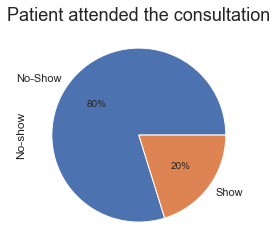

In [22]:
# Visualize percentage composition from column "No-show"
pie_plot(df['No-show'], ['No-Show', 'Show'], 'Patient attended the consultation', title_fontsize=18)

In [23]:
# Use filters to separate data with values "Yes" and "No"
no_show = df['No-show'][(df['No-show'] == "Yes")].count()
show = df['No-show'][(df['No-show'] == "No")].count()

In [24]:
# Visualize amounts
show, no_show

(88208, 22319)

In [25]:
# Function to plot bar chart
def bar_chart(list_locations, list_values, list_labels, title, xlabel, xlabel_fontsize=None, title_fontsize=None):
    """
    Input values locations, list of values, list of labels, title, xlabels and ylabels return bar plot.
    Opcional Input: fontsize from xlabel, ylabel and title.
    """
    plt.bar(list_locations, list_values, tick_label=list_labels)
    plt.title(title, fontsize=title_fontsize)
    plt.xlabel(xlabel, fontsize=xlabel_fontsize);

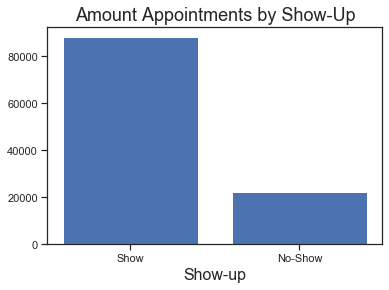

In [26]:
# Create a bar chart with proper labels
locations = [1, 2]
values = [show, no_show]
labels = ['Show', 'No-Show']
bar_chart(locations, values, labels, 'Amount Appointments by Show-Up', 'Show-up', xlabel_fontsize=16, title_fontsize=18)

- **Notes:**
    -  The most patients attend the scheduled appointment.

In [27]:
# Visualize unique values from column "Gender"
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [28]:
# Use filters to separate data with values "M" and "F"
men = df['Gender'][(df['Gender'] == "M")].count()
woman = df['Gender'][(df['Gender'] == "F")].count()

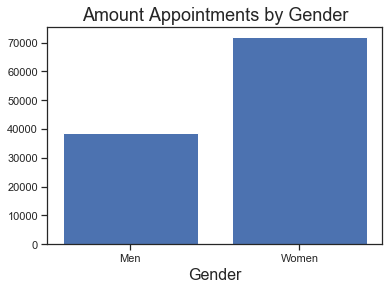

In [29]:
# Create a bar chart with proper labels
locations = [1, 2]
sex = [men, woman]
labels = ['Men', 'Women']
bar_chart(locations, sex, labels, 'Amount Appointments by Gender', 'Gender', xlabel_fontsize=16, title_fontsize=18)

- **Notes:**
    -  The most patients are women.

In [30]:
# Visualize amount data with age = -1
df[(df['Age'] < 0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


- **Notes:**
    - As it is just an entry, we will remove it.

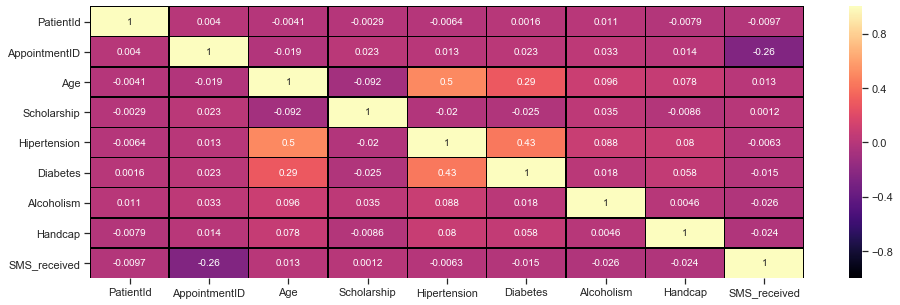

In [31]:
# Visualize correlation between columns with heatmap matrix
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='magma', linewidths=.5, linecolor='black');

- **Notes:**
    - There is an mean correlation between hypertension and age, and between hypertension and diabetes.

### Data Prep

In [32]:
# copy de dataframe original
df_cleaned = df.copy()

In [33]:
# Convert columns "ScheduledDay" and "AppointmentDay" to datetime type
df_cleaned['ScheduledDay'] = pd.to_datetime(df_cleaned['ScheduledDay'])
df_cleaned['AppointmentDay'] = pd.to_datetime(df_cleaned['AppointmentDay'])

In [34]:
# Verify change
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


- **I will create a column with the difference of days between the appointment and the consultation to verify the relationship with the no-show**

In [35]:
# Create column with differ between columns "AppointmentDay" and "ScheduledDay"
df_cleaned['wait_date'] = ((df_cleaned['AppointmentDay'].dt.date - df_cleaned['ScheduledDay'].dt.date).dt.days)

In [36]:
# Check for lines with wait_time < 0
df_cleaned[(df_cleaned['wait_date'] < 0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,wait_date
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [37]:
# Drop row with wait_date < 0 because its appers mistake
df_cleaned.drop([27033, 55226, 64175, 71533, 72362], inplace=True)

# Check for lines with wait_time < 0
df_cleaned[(df_cleaned['wait_date'] < 0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,wait_date


- **I will create a column with weekday of appointment**

In [38]:
# Create column with weekday of appointment
df_cleaned['appointment_weekday'] = df_cleaned['AppointmentDay'].dt.weekday_name

- **I will remove the columns that we will not use in the analysis and standardize the column names**

In [39]:
# drop columns 
df_cleaned.drop(['PatientId', 'AppointmentID', 'Scholarship','Neighbourhood', 'Alcoholism', 'Handcap', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

# confirm changes
df_cleaned.head(1)

,Gender,Age,Hipertension,Diabetes,SMS_received,No-show,wait_date,appointment_weekday
0,F,62,1,0,0,No,0,Friday


In [40]:
# replace - with underscores and lowercase labels
df_cleaned.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

# confirm changes
df_cleaned.head(1)

,gender,age,hipertension,diabetes,sms_received,no_show,wait_date,appointment_weekday
0,F,62,1,0,0,No,0,Friday


- **I will remove the entry with age = -1**

In [41]:
# Drop row with age = -1
df_cleaned.drop([99832], inplace=True)

# confirm changes
df_cleaned[(df_cleaned['age'] < 0)]

,gender,age,hipertension,diabetes,sms_received,no_show,wait_date,appointment_weekday


- **I will classify patients by age according to the legislation below:**
    - http://www.planalto.gov.br/ccivil_03/leis/2003/l10.741.htm
    - http://www.planalto.gov.br/ccivil_03/leis/l8069.htm

In [42]:
# Function Lambda to split age
split_age = lambda x: 'children' if x < 12 else ('teenagers' if (x > 11 and x < 19) else ('adults' if (x > 18 and x < 60) else 'seniors'))

In [43]:
# Create column "age_class"
df_cleaned['age_class'] = df_cleaned['age'].apply(split_age)

In [44]:
# Drop column "age"
df_cleaned.drop('age', axis=1, inplace=True)

In [45]:
# Check info from final dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 8 columns):
gender                 110521 non-null object
hipertension           110521 non-null int64
diabetes               110521 non-null int64
sms_received           110521 non-null int64
no_show                110521 non-null object
wait_date              110521 non-null int64
appointment_weekday    110521 non-null object
age_class              110521 non-null object
dtypes: int64(4), object(4)
memory usage: 7.6+ MB


In [46]:
# Check final dataset
df_cleaned.head(1)

,gender,hipertension,diabetes,sms_received,no_show,wait_date,appointment_weekday,age_class
0,F,1,0,0,No,0,Friday,seniors


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Do patients who receive SMS have a higher percentage of having the consultation?

In [47]:
# Separate only columns "sms_received" and "no_show"
df_sms = df_cleaned[['sms_received', 'no_show']]

In [48]:
# Check dataset
df_sms.head(1)

,sms_received,no_show
0,0,No


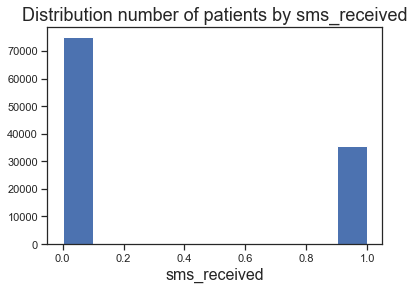

In [49]:
# Check distribution
distribution(df_sms['sms_received'], 'sms_received', xlabel_fontsize=16, title_fontsize=18)

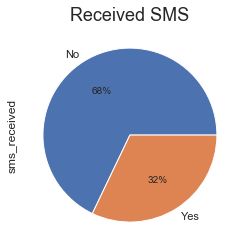

In [50]:
# Visualize percentage of composition
pie_plot(df_sms['sms_received'], ['No', 'Yes'], 'Received SMS', title_fontsize=18)

- More than half of patients do not receive SMS notification.

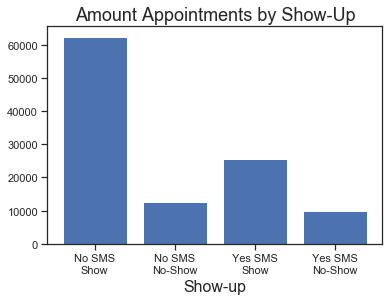

In [51]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4]
values = df_sms.groupby('sms_received')['no_show'].value_counts()
labels = ['No SMS\nShow', 'No SMS\nNo-Show', 'Yes SMS\nShow', 'Yes SMS\nNo-Show']
bar_chart(locations, values, labels, 'Amount Appointments by Show-Up', 'Show-up', xlabel_fontsize=16, title_fontsize=18)

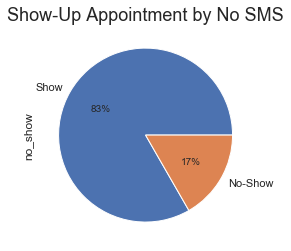

In [52]:
# Visualize percentage of composition
pie_plot(df_sms[(df_sms['sms_received'] == 0)]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by No SMS', title_fontsize=18)

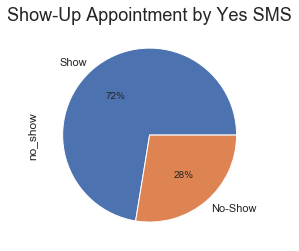

In [53]:
# Visualize percentage of composition
pie_plot(df_sms[(df_sms['sms_received'] == 1)]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Yes SMS', title_fontsize=18)

- **By analyzing the graphs it is possible to notice that the patients who received SMS had a higher rate of No-Show compared to those who did not receive.**

### 2. Which gender has the highest no-show?

In [54]:
# Separate only columns "gender" and "no_show"
df_sex = df_cleaned[['gender', 'no_show']]

In [55]:
# Check dataset
df_sex.head(1)

,gender,no_show
0,F,No


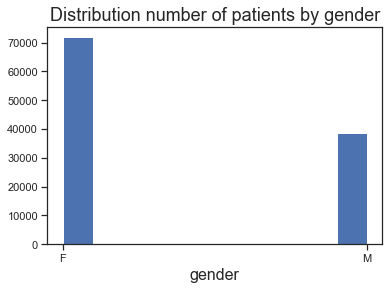

In [56]:
# Check distribution
distribution(df_sex['gender'], 'gender', xlabel_fontsize=16, title_fontsize=18)

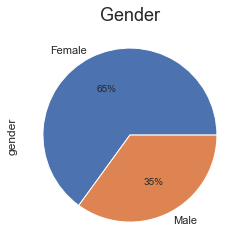

In [57]:
# Visualize percentage of composition
pie_plot(df_sex['gender'], ['Female', 'Male'], 'Gender', title_fontsize=18)

- More than half of patients are female.

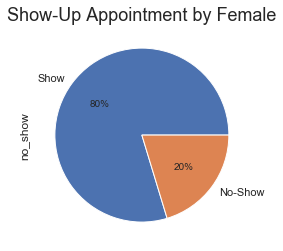

In [58]:
# Visualize percentage of composition
pie_plot(df_sex[(df_sex['gender'] == "F")]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Female', title_fontsize=18)

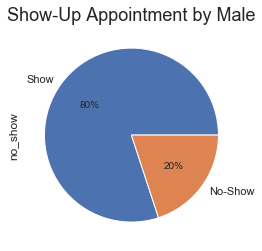

In [59]:
# Visualize percentage of composition
pie_plot(df_sex[(df_sex['gender'] == "M")]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Male', title_fontsize=18)

- **By analyzing the graphs it is possible to notice that there are no differences between no-show rates between the gender.**

### 3. Which age group has the lowest and highest no-show rate?

In [60]:
# Separate only columns "age_class" and "no_show"
df_age = df_cleaned[['age_class', 'no_show']]

In [61]:
# Check dataset
df_age.head(1)

,age_class,no_show
0,seniors,No


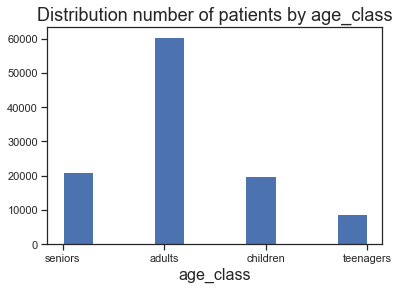

In [62]:
# Check distribution
distribution(df_age['age_class'], 'age_class', xlabel_fontsize=16, title_fontsize=18)

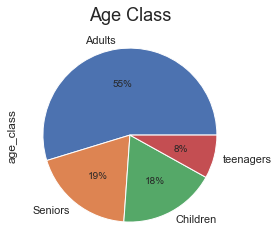

In [63]:
# Visualize percentage of composition
pie_plot(df_age['age_class'], ['Adults', 'Seniors', 'Children', 'teenagers'], 'Age Class', title_fontsize=18)

- More than half of patients are adults and teenagers representation only 8% from database.

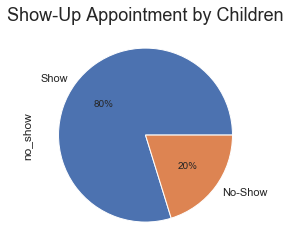

In [64]:
# Visualize percentage of composition by Children
pie_plot(df_age[(df_age['age_class'] == "children")]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Children', title_fontsize=18)

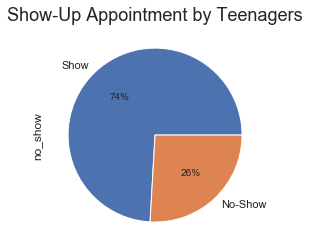

In [65]:
# Visualize percentage of composition by Teenagers
pie_plot(df_age[(df_age['age_class'] == "teenagers")]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Teenagers', title_fontsize=18)

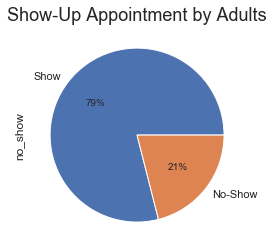

In [66]:
# Visualize percentage of composition by Adults
pie_plot(df_age[(df_age['age_class'] == "adults")]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Adults', title_fontsize=18)

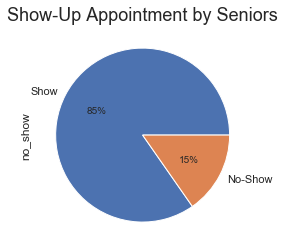

In [67]:
# Visualize percentage of composition by Seniors
pie_plot(df_age[(df_age['age_class'] == "seniors")]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Seniors', title_fontsize=18)

- **When analyzing the graphs, we noticed that the age group with the lowest no-show rate is that of the seniors and the highest is that of teenagers.**

### 4. Does too much time between scheduling and appointment day increase the rates of no-show?

In [68]:
# Separate only columns "wait_date" and "no_show"
df_wait_date = df_cleaned[['wait_date', 'no_show']]

In [69]:
# Check dataset
df_wait_date.head(1)

,wait_date,no_show
0,0,No


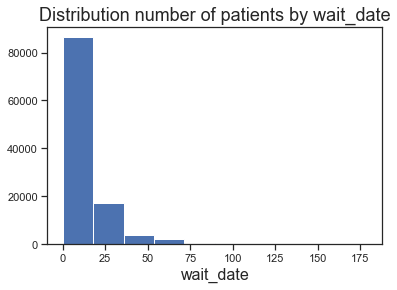

In [70]:
# Visualise Wait Date distribution
distribution(df_wait_date['wait_date'], 'wait_date', xlabel_fontsize=16, title_fontsize=18)

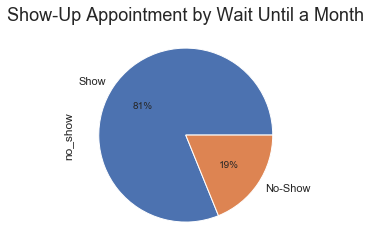

In [71]:
# Visualize percentage of composition by Wait Until a Month
pie_plot(df_wait_date[(df_wait_date['wait_date'] < 31)]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Wait Until a Month', title_fontsize=18)

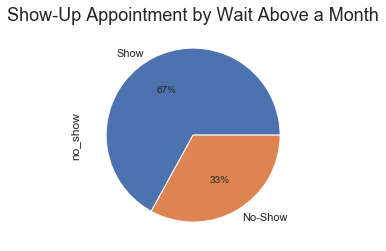

In [72]:
# Visualize percentage of composition by Wait Above a Month
pie_plot(df_wait_date[(df_wait_date['wait_date'] > 30)]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Wait Above a Month', title_fontsize=18)

- **Looking at the graphs above, we note that there is a 14% increase in the no-show rate in the appointment for scheduling intervals greater than a month compared to intervals less than a month.**

### 5. Is there any correlation between hipertension and diabetes in relation to no-shows? And which age group with hipertension and diabetes is most representative in the no-show rate?

In [73]:
# Separate only columns "hypertension", "diabetes", "age_class" and "no_show"
df_hypertension_diabetes = df_cleaned[['hipertension', 'diabetes', 'age_class', 'no_show']]

In [74]:
# Check dataset 
df_hypertension_diabetes.head(1)

,hipertension,diabetes,age_class,no_show
0,1,0,seniors,No


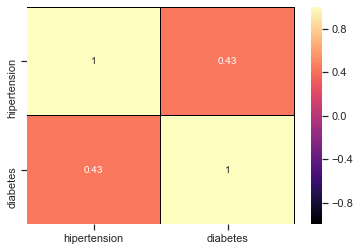

In [75]:
# Visualize correlation between columns with heatmap matrix
sns.heatmap(df_hypertension_diabetes.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='magma', linewidths=.5, linecolor='black');

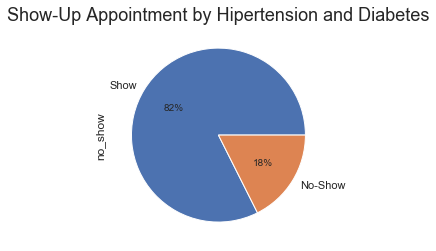

In [76]:
# Visualize percentage of composition Show-Up Appointment by Hipertension and Diabetes
pie_plot(df_hypertension_diabetes[(df_hypertension_diabetes['diabetes'] == 1) & (df_hypertension_diabetes['hipertension'] == 1)]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Hipertension and Diabetes', title_fontsize=18)

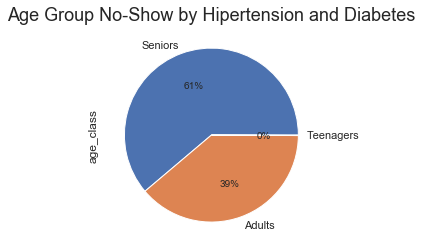

In [77]:
# Visualize percentage of composition age group by Hipertension and Diabetes
pie_plot(df_hypertension_diabetes[(df_hypertension_diabetes['diabetes'] == 1) & (df_hypertension_diabetes['hipertension'] == 1) & (df_hypertension_diabetes['no_show'] == 'Yes')]['age_class'], ['Seniors', 'Adults', 'Teenagers'], 'Age Group No-Show by Hipertension and Diabetes', title_fontsize=18)

- **Looking at the graphs above, we notice that people with hypertension and diabetes have an 18% no-show rate and of this rate 61% are in the senior age group.**

### 6. Which day of the week receives more appointments? And which has the highest no-show rate?

In [78]:
# Separate only columns "hypertension", "diabetes" and "no_show"
df_weekday = df_cleaned[['appointment_weekday', 'no_show']]

In [79]:
# Check dataset 
df_weekday.head(1)

,appointment_weekday,no_show
0,Friday,No


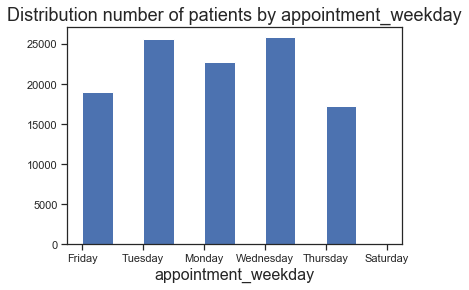

In [80]:
# Check distribution
distribution(df_weekday['appointment_weekday'], 'appointment_weekday', xlabel_fontsize=16, title_fontsize=18)

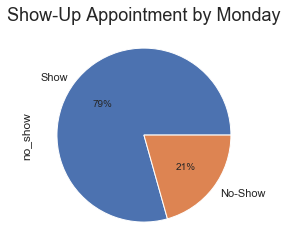

In [81]:
# Visualize percentage of composition by Monday
pie_plot(df_weekday[(df_weekday['appointment_weekday'] == 'Monday')]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Monday', title_fontsize=18)

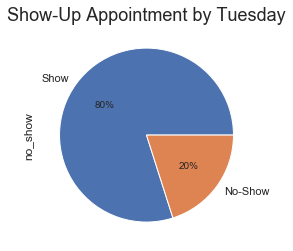

In [82]:
# Visualize percentage of composition by Tuesday
pie_plot(df_weekday[(df_weekday['appointment_weekday'] == 'Tuesday')]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Tuesday', title_fontsize=18)

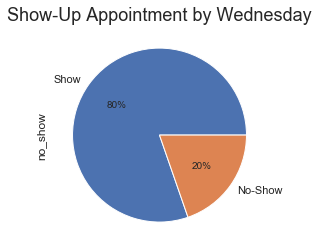

In [83]:
# Visualize percentage of composition by Wednesday
pie_plot(df_weekday[(df_weekday['appointment_weekday'] == 'Wednesday')]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Wednesday', title_fontsize=18)

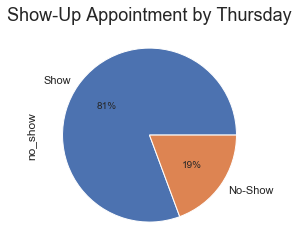

In [84]:
# Visualize percentage of composition by Thursday
pie_plot(df_weekday[(df_weekday['appointment_weekday'] == 'Thursday')]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Thursday', title_fontsize=18)

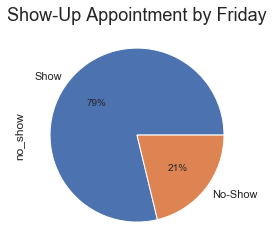

In [85]:
# Visualize percentage of composition by Friday
pie_plot(df_weekday[(df_weekday['appointment_weekday'] == 'Friday')]['no_show'], ['Show', 'No-Show'], 'Show-Up Appointment by Friday', title_fontsize=18)

- **Looking at the graphs above, we note that Tuesdays and Wednesdays are the days that receive the most appointments.**
- **Mondays and Fridays are the days with the highest no-show rates.**
- **Saturday was disregarded for having little data.**

<a id='conclusions'></a>
## Conclusions

> **Results:** Our data suggest that:
    >1. We have a higher percentage of people who received SMS and wo-show compared to people who did not receive SMS.
    >2. We have no differences  percentages of people no-show between the male or female, with a rate of 20% not being in both.
    >3. The teenagers age group has the highest percentage of no-show (26%) and the seniors age group has the lowest rate (15%).
    >4. There is a much higher percentage of no-show when the interval between the appointment day and the scheduled day is greater than 30 days, compared to intervals below 30 days.
    >5. People with diabetes and hypertension have a 18% of no-show, and of this rate the seniors are 61%.
    >6. There are not so many differences in the percentages of people who no-show comparing on days of week (variation of up to 1% between days), however the highest rates of no-show were in Monday and Saturday.

> **Limitations:** There are a couple of limitations with our data:
    >1. The data are for a short period of the year 2016. If we had data for the whole year, or even for other years, we could have seasonality analyzes.
    >2. We had a high no-show rate for those who received SMS, however we have no information on the conditions for receiving the SMS.
    >3. The handcap data does not indicate what type of disability is considered.
    >4. The data do not have information about area or specialization of medical from the scheduling.
    >5. The data variables are not highly correlated, because most of them are categorical.